This script reads in the multiple linear regression model results between Inactive GCA and Healthy controls. It gathers the proteins from Inactive GCA and Healthy controls and makes a heatmap after doing a z-score transformation on the data. Age, sex, smoking status, and BMI are denoted at the top of each heatmap for each study participant.

In [ ]:
library("dplyr")
library("ggpubr")
library("lme4")
library("lmerTest")
library("ggplot2")
library("pheatmap")
vasculitis_demographics_df <- read.csv("../../data/vasculitis_patient_info.csv")

#read in all quantile data
all_quantile_df = read.csv("../../data/all_quantile_data.csv")
#head(all_quantile_df)
#get the number of columns and rows 
num_columns <- ncol(all_quantile_df)
num_proteins <- ncol(all_quantile_df) - 3
num_samples <- nrow(all_quantile_df)


#filter only active gca patients
active_df <- filter(all_quantile_df,all_quantile_df$Study_group == "Active")
active_demographics_df <- filter(vasculitis_demographics_df,vasculitis_demographics_df$Study_group == "Active")
active_proteins_only <- active_df[,4:num_columns]

#filter inactive gca patients
inactive_df = filter(all_quantile_df,all_quantile_df$Study_group == "Inactive")
inactive_demographics_df <- filter(vasculitis_demographics_df,vasculitis_demographics_df$Study_group == "Inactive")
inactive_proteins_only <- inactive_df[,4:num_columns]

#read in controls data
controls_demographics_df <- read.csv("../../data/controls_demographics.csv")
controls_df <- filter(all_quantile_df,all_quantile_df$Study_group == "Healthy_Control")
controls_proteins_only <- controls_df[,4:num_columns]

proteins_only <- data.frame(active_df[ ,4:num_columns])
#seperate the protein names for the linear model
protein_names <- data.frame(matrix(data=0,nrow=num_proteins,ncol=1))
colnames(protein_names) <- "Protein"
protein_names[ , 1] <- data.frame(colnames(proteins_only))
#protein_names

In [4]:
get_sigfeatures = function(num_sigfigs, sigfeature_list, data_df, results_df){
  #Gather the significant features into a new dataframe
  for (i in 1:num_sigfigs) {
    feature1 <- sigfeature_list[i,1]
    feature_to_add <- data_df[feature1]
    results_df[,i] <- feature_to_add
  }
  return(results_df)
}

In [5]:
#ordered_average_feature_of_importance = average_feature_of_importance[order(-average_feature_of_importance$Average_feature_of_importance),]
inactive_df = inactive_df[order(inactive_df$maskID),]
inactive_demographics_df = inactive_demographics_df[order(inactive_demographics_df$maskid),]
inactive_df$maskID == inactive_demographics_df$maskid

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [6]:
controls_df = controls_df[order(controls_df$maskID),]
controls_demographics_df = controls_demographics_df[order(controls_demographics_df$case_id),]
controls_df$maskID == controls_demographics_df$case_id


[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [7]:
#first gather the 331 proteins that are higher in inactive GCA vs controls
#read in results for inactive gca vs controls
inactive_GCA_vs_controls_results = read.csv("../../analysis/linear_modeling_inactive_and_controls/inactive_adjusted_linear_modeling_results.csv")
positive_inactive_GCA_vs_controls_results = filter(inactive_GCA_vs_controls_results,inactive_GCA_vs_controls_results$linear_modeling_pvalue < 0.01 & inactive_GCA_vs_controls_results$fold_change > 0)
dim(positive_inactive_GCA_vs_controls_results)
num_higher_in_inactive = nrow(positive_inactive_GCA_vs_controls_results)

negative_inactive_GCA_vs_controls_results = filter(inactive_GCA_vs_controls_results,inactive_GCA_vs_controls_results$linear_modeling_pvalue < 0.01 & inactive_GCA_vs_controls_results$fold_change < 0)
dim(negative_inactive_GCA_vs_controls_results)
num_lower_in_inactive = nrow(negative_inactive_GCA_vs_controls_results)
num_significant_in_inactive = num_higher_in_inactive+num_lower_in_inactive

[1] 331   9

[1] 450   9

In [8]:
#gather the 331 proteins higher in inactive
proteins_higher_in_inactive_compared_to_controls = data.frame(matrix(data=0,nrow=30,ncol=num_higher_in_inactive))
colnames(proteins_higher_in_inactive_compared_to_controls) = positive_inactive_GCA_vs_controls_results$Protein
proteins_higher_in_inactive_compared_to_controls_names = data.frame(positive_inactive_GCA_vs_controls_results$Protein)
proteins_higher_in_inactive_compared_to_controls = get_sigfeatures(num_higher_in_inactive,proteins_higher_in_inactive_compared_to_controls_names, inactive_df, proteins_higher_in_inactive_compared_to_controls)
dim(proteins_higher_in_inactive_compared_to_controls)

[1]  30 331

In [9]:
#same for controls
control_proteins_higher_in_inactive_compared_to_controls = data.frame(matrix(data=0,nrow=30,ncol=num_higher_in_inactive))
colnames(control_proteins_higher_in_inactive_compared_to_controls) = positive_inactive_GCA_vs_controls_results$Protein
control_proteins_higher_in_inactive_compared_to_controls = get_sigfeatures(num_higher_in_inactive,proteins_higher_in_inactive_compared_to_controls_names, controls_df, proteins_higher_in_inactive_compared_to_controls)
dim(control_proteins_higher_in_inactive_compared_to_controls)

[1]  30 331

In [10]:
#now get the 450 proteins that are lower in inactive gca compared to controls
lower_inactive_gca = data.frame(matrix(data=0,nrow=30,ncol=num_lower_in_inactive))
colnames(lower_inactive_gca) = negative_inactive_GCA_vs_controls_results$Protein
proteins_lower_inactive_gca_names = data.frame(negative_inactive_GCA_vs_controls_results$Protein)
lower_inactive_gca = get_sigfeatures(num_lower_in_inactive,proteins_lower_inactive_gca_names,inactive_df,lower_inactive_gca)
lower_inactive_gca$Study_group = inactive_df$Study_group
lower_inactive_gca$sample_ID = inactive_df$sample_ID
lower_inactive_gca$smoking = inactive_demographics_df$Smoking
lower_inactive_gca$sex = inactive_demographics_df$Sex
lower_inactive_gca$age = inactive_demographics_df$Age
lower_inactive_gca$bmi = inactive_demographics_df$BMI_Kg_M2

dim(lower_inactive_gca)
head(lower_inactive_gca)

[1]  30 456

,c.Raf_10001.7,PNP_10039.32,CUL3_10045.47,ILK1_10053.5,AP4M1_10076.1,STAT3_10346.5,STAT3_10354.57,SMAD3_10363.13,SMAD2_10364.6,STAT1_10370.21,⋯,ACTN1_9843.5,CRKL_9877.28,PPIL1_9884.8,DUS28_9940.35,Study_group,sample_ID,smoking,sex,age,bmi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,274.6056,1828.133,1305.7389,2411.907,1044.281,9270.172,4331.860,6087.917,1401.640,283.8406,⋯,1402.3156,794.5189,88.98667,433.8189,Inactive,KP5W,No,Male,69.3,NA
2,435.6033,5774.904,889.8122,22838.854,1094.198,27039.138,7314.908,7181.793,5039.172,1314.7089,⋯,15024.2333,3721.0711,175.99667,2403.9322,Inactive,KP8Z,No,Female,72.2,NA
3,401.6656,5491.260,892.3606,22004.743,1138.808,32448.238,7995.020,6447.822,5264.197,1398.8600,⋯,12809.3622,4264.4022,203.57333,2052.1300,Inactive,KPAN,No,Male,80.0,29.51173
4,260.8228,1784.093,641.9478,2577.004,1828.133,6439.502,1685.121,3441.479,1348.896,238.6189,⋯,906.2211,794.2078,87.51667,383.3100,Inactive,KNZD,Yes,Female,63.6,29.83706
5,244.7106,3166.557,668.0011,7825.298,1050.134,14109.671,2725.740,4914.937,2438.378,691.2778,⋯,5749.1344,1601.3922,74.73111,1204.7556,Inactive,KNVL,Yes,Female,65.6,23.17741
6,251.7978,1509.409,678.9722,1187.322,1151.278,9079.757,2019.378,4110.789,1073.219,443.3711,⋯,601.6489,802.1989,79.45111,289.3178,Inactive,KP7R,No,Female,72.8,27.75488


In [11]:
#do the same for controls, get 450 proteins
lower_in_controls = data.frame(matrix(data=0,nrow=30,ncol=num_lower_in_inactive))
colnames(lower_in_controls) = negative_inactive_GCA_vs_controls_results$Protein
lower_in_controls = get_sigfeatures(num_lower_in_inactive,proteins_lower_inactive_gca_names,controls_df,lower_in_controls)
lower_in_controls$Study_group = controls_df$Study_group
lower_in_controls$sample_ID = controls_df$sample_ID
lower_in_controls$smoking = controls_demographics_df$Smoking
lower_in_controls$sex = controls_demographics_df$control_gender
lower_in_controls$age = controls_demographics_df$Age
lower_in_controls$bmi = controls_demographics_df$BMI_Kg_M2
dim(lower_in_controls)
head(lower_in_controls)

[1]  30 456

,c.Raf_10001.7,PNP_10039.32,CUL3_10045.47,ILK1_10053.5,AP4M1_10076.1,STAT3_10346.5,STAT3_10354.57,SMAD3_10363.13,SMAD2_10364.6,STAT1_10370.21,⋯,ACTN1_9843.5,CRKL_9877.28,PPIL1_9884.8,DUS28_9940.35,Study_group,sample_ID,smoking,sex,age,bmi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,712.5500,6867.486,1309.0883,20720.06,1902.852,44995.91,9826.001,10706.388,10646.373,2046.187,⋯,17821.79,6139.489,233.83889,3564.731,Healthy_Control,22103005529,Yes,Male,71,13.94703
2,1028.2911,7304.909,1618.5478,24028.81,2949.580,42636.64,10373.630,11288.948,12018.820,2432.592,⋯,21901.82,7742.909,392.76222,5780.831,Healthy_Control,22103004925,Yes,Female,72,28.34196
3,764.6367,6072.292,965.7422,22583.70,2456.851,36490.44,9339.211,9024.106,9663.853,2105.191,⋯,16992.52,5310.793,225.15444,2773.471,Healthy_Control,22103004932,Yes,Male,78,NA
4,1163.6611,10442.700,1364.2056,26358.87,3350.176,50673.13,10517.229,11012.171,11853.703,2390.761,⋯,24457.41,8353.691,385.83556,4274.401,Healthy_Control,22103004914,No,Female,64,26.62512
5,313.0933,6464.126,1230.5333,15864.27,1084.618,26705.90,6613.471,7469.062,5992.352,1567.708,⋯,12782.32,3946.473,186.92611,3749.327,Healthy_Control,22103005528,No,Female,67,19.89081
6,482.3789,4936.073,1256.4778,17902.71,1598.349,31019.51,6155.934,8715.849,7731.137,1375.559,⋯,11337.11,4150.799,96.24111,3533.322,Healthy_Control,22103004931,No,Female,70,28.66156


In [12]:
#combine all proteins that are lower
lower_in_inactive_and_control = rbind(lower_inactive_gca,lower_in_controls)
dim(lower_in_inactive_and_control)
head(lower_in_inactive_and_control)

[1]  60 456

,c.Raf_10001.7,PNP_10039.32,CUL3_10045.47,ILK1_10053.5,AP4M1_10076.1,STAT3_10346.5,STAT3_10354.57,SMAD3_10363.13,SMAD2_10364.6,STAT1_10370.21,⋯,ACTN1_9843.5,CRKL_9877.28,PPIL1_9884.8,DUS28_9940.35,Study_group,sample_ID,smoking,sex,age,bmi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,274.6056,1828.133,1305.7389,2411.907,1044.281,9270.172,4331.860,6087.917,1401.640,283.8406,⋯,1402.3156,794.5189,88.98667,433.8189,Inactive,KP5W,No,Male,69.3,NA
2,435.6033,5774.904,889.8122,22838.854,1094.198,27039.138,7314.908,7181.793,5039.172,1314.7089,⋯,15024.2333,3721.0711,175.99667,2403.9322,Inactive,KP8Z,No,Female,72.2,NA
3,401.6656,5491.260,892.3606,22004.743,1138.808,32448.238,7995.020,6447.822,5264.197,1398.8600,⋯,12809.3622,4264.4022,203.57333,2052.1300,Inactive,KPAN,No,Male,80.0,29.51173
4,260.8228,1784.093,641.9478,2577.004,1828.133,6439.502,1685.121,3441.479,1348.896,238.6189,⋯,906.2211,794.2078,87.51667,383.3100,Inactive,KNZD,Yes,Female,63.6,29.83706
5,244.7106,3166.557,668.0011,7825.298,1050.134,14109.671,2725.740,4914.937,2438.378,691.2778,⋯,5749.1344,1601.3922,74.73111,1204.7556,Inactive,KNVL,Yes,Female,65.6,23.17741
6,251.7978,1509.409,678.9722,1187.322,1151.278,9079.757,2019.378,4110.789,1073.219,443.3711,⋯,601.6489,802.1989,79.45111,289.3178,Inactive,KP7R,No,Female,72.8,27.75488


In [13]:
#combine to plot
all_proteins_higher_in_inactive_compared_to_controls = rbind(proteins_higher_in_inactive_compared_to_controls,control_proteins_higher_in_inactive_compared_to_controls)
dim(all_proteins_higher_in_inactive_compared_to_controls)

[1]  60 331

In [14]:
#1. combine all proteins to plot
all_proteins_inactive_and_controls = cbind(all_proteins_higher_in_inactive_compared_to_controls,lower_in_inactive_and_control)
dim(all_proteins_inactive_and_controls)
head(all_proteins_inactive_and_controls)

[1]  60 787

,HNF4A_10041.3,WN10A_10044.12,PIAS4_10342.55,CLGN_10600.24,CASC4_10613.33,COSA1_10702.1,fibulin.5_10738.11,KERA_10758.2,fibulin.1_10819.108,PLXB2_10855.55,⋯,ACTN1_9843.5,CRKL_9877.28,PPIL1_9884.8,DUS28_9940.35,Study_group,sample_ID,smoking,sex,age,bmi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,30923.827,648.0022,370.2744,6686.048,2522.020,4700.513,45221.48,2835.842,6293.910,5452.431,⋯,1402.3156,794.5189,88.98667,433.8189,Inactive,KP5W,No,Male,69.3,NA
2,8196.484,749.5289,382.7289,3817.143,1511.650,2274.060,20562.61,1855.252,2888.464,4946.101,⋯,15024.2333,3721.0711,175.99667,2403.9322,Inactive,KP8Z,No,Female,72.2,NA
3,15120.460,514.9422,425.5733,2777.336,2016.811,6162.259,19454.88,1811.537,4158.620,3810.770,⋯,12809.3622,4264.4022,203.57333,2052.1300,Inactive,KPAN,No,Male,80.0,29.51173
4,19969.433,613.0211,352.2194,3350.176,2651.973,10027.636,34052.29,1855.252,4823.550,1377.220,⋯,906.2211,794.2078,87.51667,383.3100,Inactive,KNZD,Yes,Female,63.6,29.83706
5,18245.277,1247.2589,441.9111,9913.011,2443.334,4640.729,31111.01,1633.691,8864.027,4223.133,⋯,5749.1344,1601.3922,74.73111,1204.7556,Inactive,KNVL,Yes,Female,65.6,23.17741
6,35238.796,1127.8956,431.5433,8789.543,4107.701,9054.462,39010.94,2211.910,7130.291,8377.241,⋯,601.6489,802.1989,79.45111,289.3178,Inactive,KP7R,No,Female,72.8,27.75488


In [15]:
all_proteins_inactive_and_controls$sample_ID

[1] "KP5W"        "KP8Z"        "KPAN"        "KNZD"        "KNVL"       
 [6] "KP7R"        "KP2X"        "KP92"        "KP9V"        "KP7B"       
[11] "KPA5"        "KP9D"        "KP7V"        "KP6Y"        "KNV9"       
[16] "KP4A"        "KP8Q"        "KP9P"        "KP4D"        "KP2G"       
[21] "KP9A"        "KPA6"        "KP7J"        "KP8L"        "KNWJ"       
[26] "KP6N"        "KNU4"        "KP3W"        "KNVH"        "KP37"       
[31] "22103005529" "22103004925" "22103004932" "22103004914" "22103005528"
[36] "22103004931" "22103004920" "22103004922" "22103004930" "22103004912"
[41] "22103004917" "22103004933" "22103004921" "22103004915" "22103005526"
[46] "22103004911" "22103004923" "22103004928" "22103004913" "22103004929"
[51] "22103004918" "22103004935" "22103004934" "22103004927" "22103005525"
[56] "22103005527" "22103004916" "22103004926" "22103004919" "22103004924"

In [16]:
#1. Remove the column of Case IDs and sample status. Make the row names the Case ID
all_proteins_inactive_and_controls_only = all_proteins_inactive_and_controls[,1:num_significant_in_inactive]
dim(all_proteins_inactive_and_controls_only)
rownames(all_proteins_inactive_and_controls_only) = all_proteins_inactive_and_controls$sample_ID
head(all_proteins_inactive_and_controls_only)

[1]  60 781

,HNF4A_10041.3,WN10A_10044.12,PIAS4_10342.55,CLGN_10600.24,CASC4_10613.33,COSA1_10702.1,fibulin.5_10738.11,KERA_10758.2,fibulin.1_10819.108,PLXB2_10855.55,⋯,S100A4_9750.7,JNK2_9760.13,HNRPF_9764.79,Fragile.histidine.triad.protein_9826.135,HGD_9832.33,SMAD1_9838.4,ACTN1_9843.5,CRKL_9877.28,PPIL1_9884.8,DUS28_9940.35
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KP5W,30923.827,648.0022,370.2744,6686.048,2522.020,4700.513,45221.48,2835.842,6293.910,5452.431,⋯,676.6300,1734.438,13919.05,649.0667,439.6278,822.6178,1402.3156,794.5189,88.98667,433.8189
KP8Z,8196.484,749.5289,382.7289,3817.143,1511.650,2274.060,20562.61,1855.252,2888.464,4946.101,⋯,831.4261,3081.119,21440.80,1963.0389,971.2544,1392.3067,15024.2333,3721.0711,175.99667,2403.9322
KPAN,15120.460,514.9422,425.5733,2777.336,2016.811,6162.259,19454.88,1811.537,4158.620,3810.770,⋯,1235.0711,2152.961,23756.57,2666.6700,1340.8300,1178.1256,12809.3622,4264.4022,203.57333,2052.1300
KNZD,19969.433,613.0211,352.2194,3350.176,2651.973,10027.636,34052.29,1855.252,4823.550,1377.220,⋯,678.0844,1479.199,15434.17,507.3383,515.4133,767.7244,906.2211,794.2078,87.51667,383.3100
KNVL,18245.277,1247.2589,441.9111,9913.011,2443.334,4640.729,31111.01,1633.691,8864.027,4223.133,⋯,680.9144,1860.806,25412.64,1008.0133,547.9922,940.0911,5749.1344,1601.3922,74.73111,1204.7556
KP7R,35238.796,1127.8956,431.5433,8789.543,4107.701,9054.462,39010.94,2211.910,7130.291,8377.241,⋯,746.7761,1396.257,17556.17,404.6622,916.4206,781.6444,601.6489,802.1989,79.45111,289.3178


In [17]:
#2.#Make a vector of the sample status for the heatmap
 
colors_df2 <- data.frame(matrix(data = 0, nrow = 60, ncol=5))
colnames(colors_df2) <- c("Study_group","sex","smoking","age","bmi")
# #print(colors_df)
colors_df2[,1] <- all_proteins_inactive_and_controls$Study_group
colors_df2[,2] <- all_proteins_inactive_and_controls$sex
colors_df2[,3] <- all_proteins_inactive_and_controls$smoking
colors_df2[,4] <- all_proteins_inactive_and_controls$age
colors_df2[,5] <- all_proteins_inactive_and_controls$bmi

rownames(colors_df2) <- all_proteins_inactive_and_controls$sample_ID
head(colors_df2)

,Study_group,sex,smoking,age,bmi
,<chr>,<chr>,<chr>,<dbl>,<dbl>
KP5W,Inactive,Male,No,69.3,NA
KP8Z,Inactive,Female,No,72.2,NA
KPAN,Inactive,Male,No,80.0,29.51173
KNZD,Inactive,Female,Yes,63.6,29.83706
KNVL,Inactive,Female,Yes,65.6,23.17741
KP7R,Inactive,Female,No,72.8,27.75488


In [18]:
# 3. define the breaks
# library(RColorBrewer)
# break_list = seq(-2,2.0, by=0.1)
# color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(break_list))
paletteLength <- 100
myColor <- colorRampPalette(c("Royalblue", "white", "Firebrick"))(paletteLength)
myBreaks <- c(seq(-6, 0, length.out=ceiling(paletteLength/2) + 1), 
              seq(6/paletteLength, 6, length.out=floor(paletteLength/2)))

In [19]:
#4. z score
zscore_all_proteins_inactive_and_controls_only = scale(all_proteins_inactive_and_controls_only, center=TRUE,scale=TRUE)
zscore_all_proteins_inactive_and_controls_only_transposed = t(zscore_all_proteins_inactive_and_controls_only)
colnames(zscore_all_proteins_inactive_and_controls_only_transposed) = all_proteins_inactive_and_controls$sample_ID

In [23]:
#save output
write.csv(zscore_all_proteins_inactive_and_controls_only_transposed,"../../analysis/Figure2_A_B_C_D_E_F/inactive_and_control_proteins_for_heatmap.csv",row.names=FALSE)

pdf 
  2

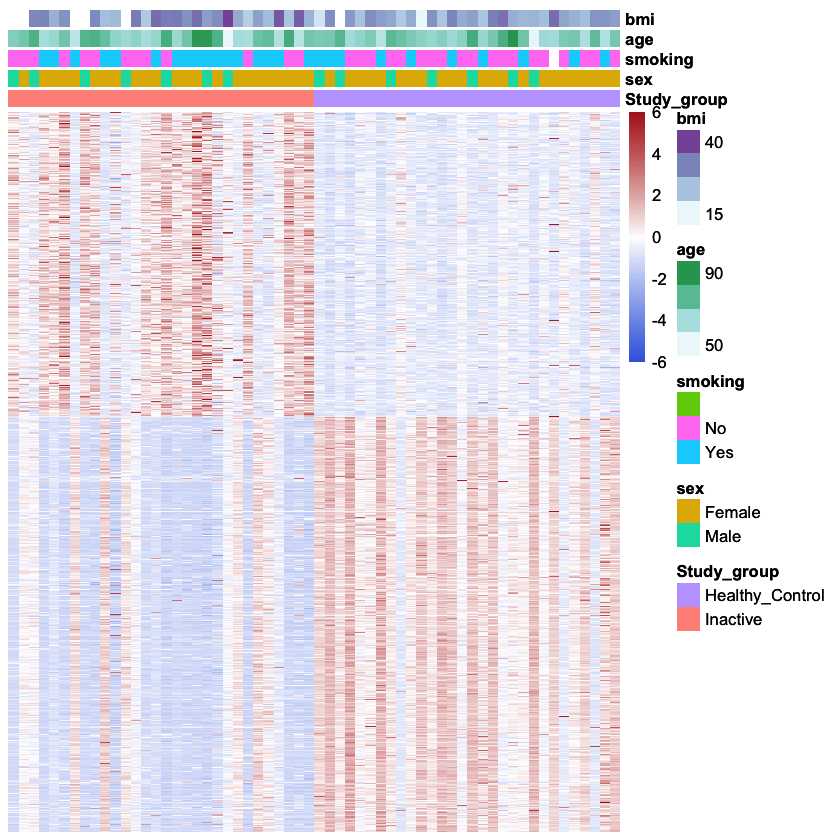

In [21]:
heatmap_plot3 <- pheatmap(zscore_all_proteins_inactive_and_controls_only_transposed, annotation = colors_df2,show_colnames = FALSE,
                          show_rownames = FALSE, cluster_cols = FALSE, cluster_rows = FALSE,   color = myColor, breaks = myBreaks)
pdf(file="../../analysis/Figure2_A_B_C_D_E_F/Inactive_GCA_vs_Controls_heatmap.pdf")
print(heatmap_plot3)
dev.off()
print(heatmap_plot3)

In [22]:
#only plot age
#2.#Make a vector of the sample status for the heatmap
 
colors_df3 <- data.frame(matrix(data = 0, nrow = 60, ncol=1))
colnames(colors_df3) <- c("age")
# #print(colors_df)
colors_df3[,1] <- all_proteins_inactive_and_controls$age
rownames(colors_df3) <- all_proteins_inactive_and_controls$sample_ID
head(colors_df3)

,age
,<dbl>
KP5W,69.3
KP8Z,72.2
KPAN,80.0
KNZD,63.6
KNVL,65.6
KP7R,72.8


pdf 
  2

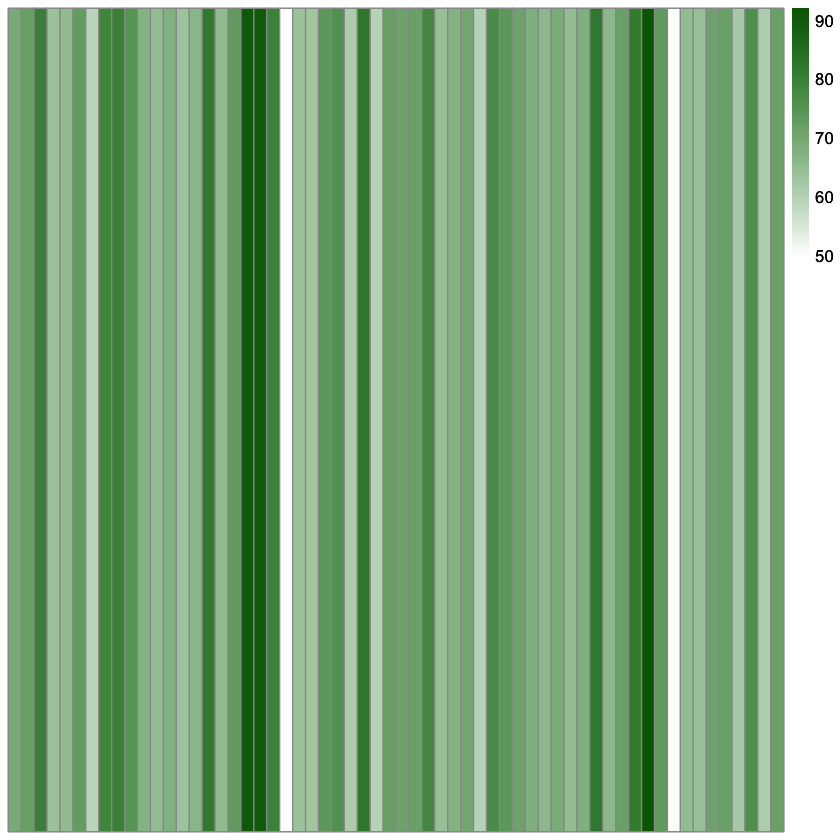

In [23]:
heatmap_plot4 <- pheatmap(t(colors_df3),show_colnames = FALSE,
                          show_rownames = FALSE, cluster_cols = FALSE, cluster_rows = FALSE,color = colorRampPalette(c("white","darkgreen"))(n=100))
pdf(file="../../analysis/Figure2_A_B_C_D_E_F/Inactive_GCA_vs_Controls_age_heatmap.pdf")
print(heatmap_plot4)
dev.off()
print(heatmap_plot4)

In [25]:
#only plot age
#2.#Make a vector of the sample status for the heatmap
 
colors_df4 <- data.frame(matrix(data = 0, nrow = 60, ncol=1))
colnames(colors_df4) <- c("bmi")
# #print(colors_df)
colors_df4[,1] <- all_proteins_inactive_and_controls$bmi
rownames(colors_df4) <- all_proteins_inactive_and_controls$sample_ID
head(colors_df4)

,bmi
,<dbl>
KP5W,NA
KP8Z,NA
KPAN,29.51173
KNZD,29.83706
KNVL,23.17741
KP7R,27.75488


pdf 
  2

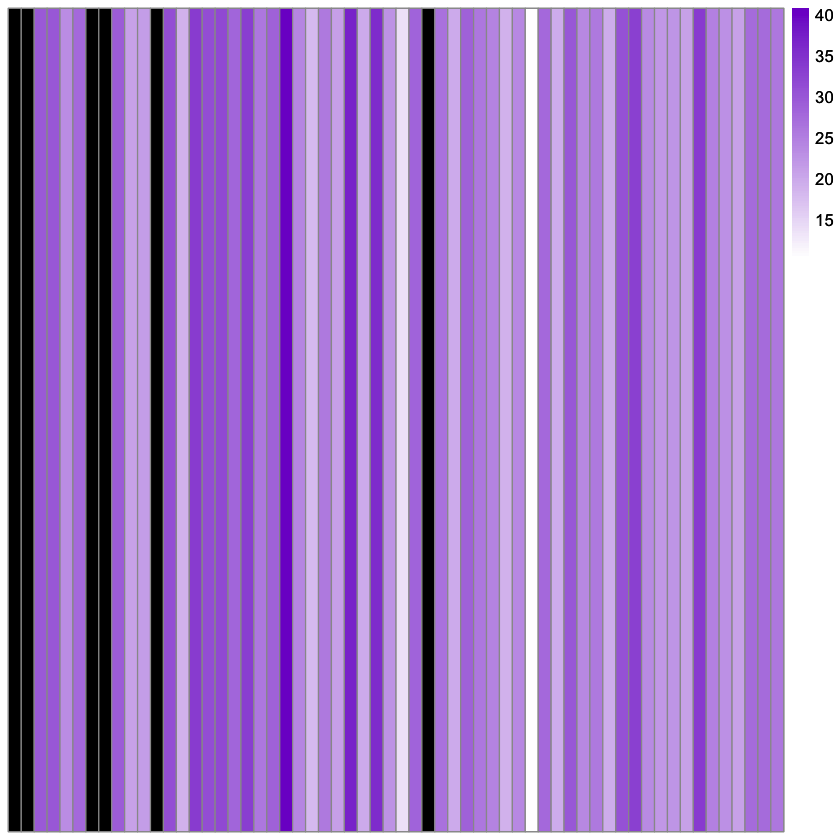

In [26]:
heatmap_plot5 <- pheatmap(t(colors_df4),show_colnames = FALSE, show_rownames = FALSE, cluster_cols = FALSE, 
                          cluster_rows = FALSE,color = colorRampPalette(c("white","purple3"))(n=100), na_col = "black")
pdf(file="../../analysis/Figure2_A_B_C_D_E_F/Inactive_GCA_vs_Controls_bmi_heatmap.pdf")
print(heatmap_plot5)
dev.off()
print(heatmap_plot5)